In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import seaborn as sb

# Examine ASO (Airborne Snow Lidar)  data for the East River

In [2]:
base = pathlib.Path("/Volumes/Transcend/ASOdata/swe_data/50m_clipped_to_east")
dem_base = pathlib.Path("/Volumes/Transcend/ASOdata/DEMs")

In [3]:
len([x for x in base.glob("*USCOGE*.tif")])

4

In [4]:
dts = ['20180331', '20180524', '20190407', '20190610']

## 1. Open and Plot the East River DEM

In [5]:
east_river_area_m2 = 748983000.0 # m2 ---- COMPUTED ELSEWHERE (but we can double check)

In [6]:
dem = xr.open_rasterio(dem_base.joinpath("3mdem_upsample_50m_clipped_to_east.tif"))

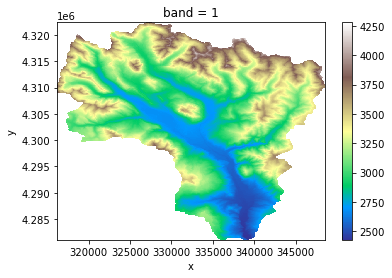

In [7]:
dem.where(dem>0).plot(cmap='terrain')

In [8]:
dem.where(dem>0).shape

(1, 827, 646)

## 2. Open ASO data

In [8]:
time_var = xr.Variable('time', range(4))
ds = xr.concat([xr.open_rasterio(base.joinpath(x)) for x in base.glob("*USCOGE*.tif")], dim=time_var)

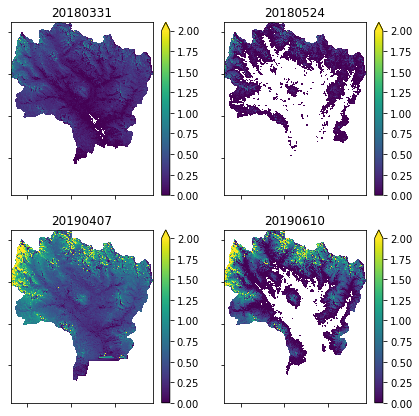

In [9]:
fig,ax = plt.subplots(2,2)
fig.set_size_inches(7,7)
ds.where(ds>0).sel(time=0).plot(ax=ax[0,0], vmin=0, vmax=2)
ds.where(ds>0).sel(time=1).plot(ax=ax[0,1], vmin=0, vmax=2)
ds.where(ds>0).sel(time=2).plot(ax=ax[1,0], vmin=0, vmax=2)
ds.where(ds>0).sel(time=3).plot(ax=ax[1,1], vmin=0, vmax=2)

ax[0,0].set_title(dts[0])
ax[0,1].set_title(dts[1])
ax[1,0].set_title(dts[2])
ax[1,1].set_title(dts[3])


# get rid of the axis text 
for axx in ax.flatten():
    axx.set_xlabel('')
    axx.set_ylabel('')
    axx.set_yticklabels([])
    axx.set_xticklabels([])

    

Text(0.5, 1.0, '2019-04-07')

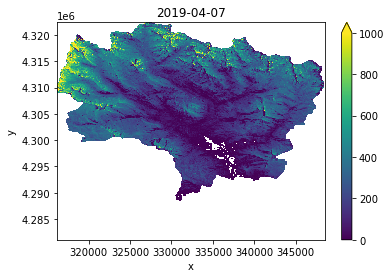

In [25]:
fig,ax = plt.subplots(1)
(ds.where(ds>0).sel(time=0)*1000).plot(vmin=0, vmax=1000, ax=ax)
ax.set_title("2018-03-31")

Text(0.5, 1.0, '2019-04-07')

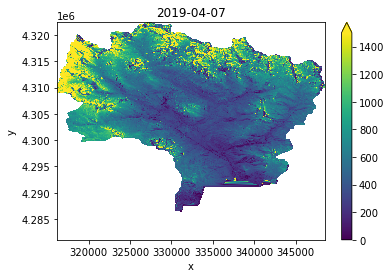

In [29]:
fig,ax = plt.subplots(1)
(ds.where(ds>0).sel(time=2)*1000).plot(vmin=0, vmax=1500, ax=ax)
ax.set_title("2019-04-07")

## 3. Compute the Snow water storage

In [10]:
ssum = [ds.where(ds>0).sel(time=x).sum() for x in range(4)]

In [11]:
(np.array(ssum)*50*50)/east_river_area_m2*1000.

array([211.09047,  45.98248, 573.81995, 281.07144], dtype=float32)

In [12]:
ds.where(ds>0).shape

(4, 1, 827, 646)

In [13]:
np.array(ssum)/(827*646)*1000.

array([118.37569046,  25.78614011, 321.78775021, 157.61975612])

# 4. snow vs height

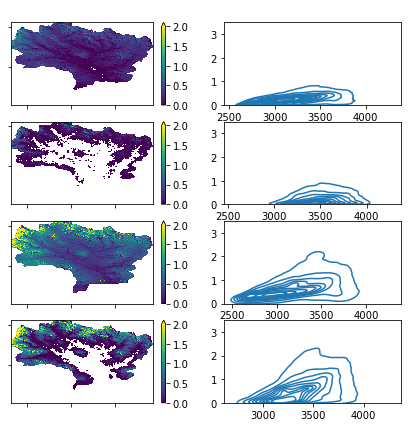

In [14]:
fig,ax = plt.subplots(4,2)
fig.set_size_inches(7,7)

# plot the maps 
ds.where(ds>0).sel(time=0).plot(ax=ax[0,0], vmin=0, vmax=2)
ds.where(ds>0).sel(time=1).plot(ax=ax[1,0], vmin=0, vmax=2)
ds.where(ds>0).sel(time=2).plot(ax=ax[2,0], vmin=0, vmax=2)
ds.where(ds>0).sel(time=3).plot(ax=ax[3,0], vmin=0, vmax=2)

flat_dem = dem.where(dem>0).values.flatten()

# plot the distributions 
sb.kdeplot(x=flat_dem, y=ds.where(ds>0.01).sel(time=0).values.flatten(), ax=ax[0,1])
sb.kdeplot(x=flat_dem, y=ds.where(ds>0.01).sel(time=1).values.flatten(), ax=ax[1,1])
sb.kdeplot(x=flat_dem, y=ds.where(ds>0.01).sel(time=2).values.flatten(), ax=ax[2,1])
sb.kdeplot(x=flat_dem, y=ds.where(ds>0.01).sel(time=3).values.flatten(), ax=ax[3,1])


# get rid of the axis text 
for i in range(4):
    ax[i,0].set_title(" ")
    ax[i,0].set_xlabel('')
    ax[i,0].set_ylabel('')
    ax[i,0].set_yticklabels([])
    ax[i,0].set_xticklabels([])

for i in range(4):
    ax[i,1].set_ylim(0,3.5)


AttributeError: 'QuadMesh' object has no property 'ylim'

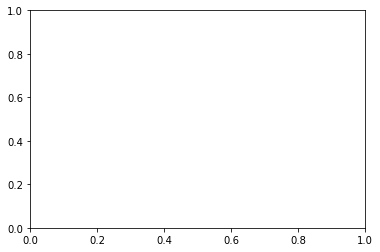

In [19]:
# plt.scatter(flat_dem, ds.where(ds>0).sel(time=0).values.flatten(), color='black', alpha=.2)
# plt.scatter(flat_dem, ds.where(ds>0).sel(time=1).values.flatten(), color='green', alpha=.2)
#plt.scatter(flat_dem, ds.where(ds>0).sel(time=2).values.flatten(), color='red', alpha=.02)
# plt.(flat_dem, ds.where(ds>0).sel(time=3).values.flatten(), color='purple', alpha=.02)
fig,ax = plt.subplots()
sb.histplot(x=flat_dem, y=ds.where(ds>0.01).sel(time=3).values.flatten(), ax=ax, ylim=(0,7))

In [20]:
help(sb.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.
    
    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    disrete bins.
    
    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate,